In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import optimize as opt

# Funktionene implementieren

Wie auf dem Zettel vorgerechnet ergibt sich als Gleichung:

$\Large \int_{Z_{0,1}(\epsilon_n)}^{Z_{0,1}(\epsilon_n)} \sqrt{\epsilon_n - 16 \cdot (1 - e^{-z})^2} dz \overset{!}{=}  \pi \cdot \left( n + \frac{1}{2} \right)$

Dabei sind $Z_{0,1}$ und $Z_{0,2}$ gegeben durch:

$ -log \left( 1 \pm \sqrt{\frac{\epsilon_n}{16}}\right)$

In [2]:
def integrand(z,E):
    return np.sqrt(E-16*(1-np.exp(-z))**2)

In [3]:
def upper_bound(E):
    return -1*np.log(1-np.sqrt(E/16))

In [4]:
def lower_bound(E):
    return -1*np.log(1+np.sqrt(E/16))

In [5]:
def potential(z):
    return 16*(1-np.exp(-z))**2

In [6]:
def generate_eigenvalues(upper_eigenvalue):
    eigenvalues = [] # Liste mit den bestimmten Eigenwerten
    # Bereich in dem die Nullstelle bestimmt werden soll
    upper_root = 15.999999999999999 # Für höhere Werte divergiert das Integral
    lower_root = 0.1 # Wenn die untere Grenze auf 0 gesetzt wird, wird als Lösung immer 0 ausgegeben
    # Durchlaufen der n, bis upper_eigenvalue erreicht ist
    for n in range(0,upper_eigenvalue):
        # convertiere das integral in eine aufrufbare funktion, die nur noch von der Energie abhängt
        final_equation = lambda E: integrate.quad(lambda x: integrand(x,E),lower_bound(E),upper_bound(E))[0]-np.pi*(0.5+n)
        eigenvalues.append(opt.brentq(final_equation,lower_root,upper_root))
    return eigenvalues

In [7]:
liste = generate_eigenvalues(4)

In [8]:
liste

[3.75, 9.750000000000037, 13.75000000000022]

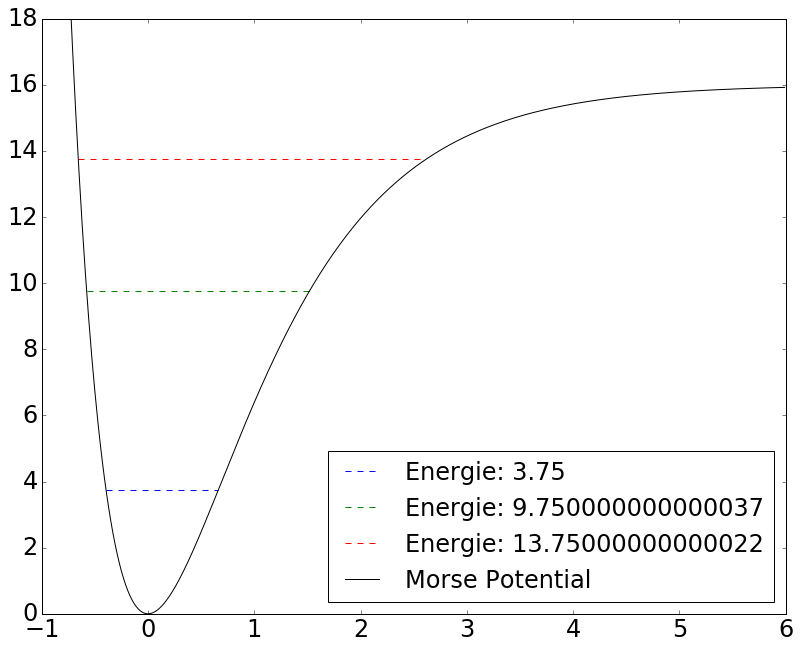

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0/1.5, 16.0/1.5)

for i in liste:
    xs = np.arange(lower_bound(i),upper_bound(i),0.01)
    plt.plot(xs,xs/xs*i,'--',label="Energie: " + str(i))
xs = np.arange(-1,6,0.01)
plt.plot(xs,potential(xs),'k',label="Morse Potential")

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim([-1,6])
plt.ylim([0,18])

plt.legend(loc='best', fontsize=24)
plt.show()